# Lecture 8

Lesson Objectives
 - Convergence = Consistency + Stability
 - Stability Region
 - Trapezoid Method
 - Heun's Method


____

## Convergence

When we say a numerical ODE method is convergent, we're saying,
$$N\to \infty, \qquad y(t_{i})-y_{i}\to 0$$
Or another way of putting this, since we're dealing with finite precision arithmetic, 

$$|y(t_{i})-y_{i}|=c_1 \varepsilon +c_2 h^{q}$$

where $\varepsilon$ is machine precision ($\approx 10^{-16}$) and $h$ is the time step and $q$ is the order of the error. As $N\to\infty$, then $h\to 0$, so the only source of error would be from rounding.

Generally, we talk about convergence as being satisfied if there are two conditions satisfied:

$$\mbox{Convergence }=\mbox{ Consistency }+\mbox{ Stability}$$


___

## Consistency


A method is consistent, we assume $y_{i}=y(t_{i}), y_{i-1}=y(t_{i-1}),...$ and show for a general multi-step method 

$$y_{i+1}=\sum_{j=1}^{k}a_{i+1-j}y_{i+1-j}+\sum_{j=0}^{k}b_{i+1-j}f(t_{i+1-j},y_{i+1-j})$$

that $y_{i+1}=y(t_{i+1})$ as $h\to 0$. In essence, we need to prove that the local truncation error is $O(h^{q})$ where $q>1$.

Another was to think about it is

$$\lim_{h\to0}\frac{\epsilon_{i}}{h}=0$$

where $\epsilon_{i}$ is the local truncation error.



____

#### General Multi-Step Formula

Looking at the general multi-step form
$$y_{i+1}=\sum_{j=1}^{k}a_{i+1-j}y_{i+1-j}+\sum_{j=0}^{k}b_{i+1-j}f(t_{i+1-j},y_{i+1-j})$$

We can note a few methods from this form. 

Let $k=1$ and $a_{i}=1$, $b_{i}=h$, and $b_{i+1}=0$, and we have **Forward Euler**

$$y_{i+1}=1\cdot y_{i}+0\cdot f(t_{i+1},y_{i+1})+h\cdot f(t_{i},y_{i})=y_{i}+hf(t_i,y_i)$$

Let $k=1$ and $a_{i}=1$, $b_{i}=0$, and $b_{i+1}=h$, and we have **Backward Euler**

$$y_{i+1}=1\cdot y_{i}+h\cdot f(t_{i+1},y_{i+1})+0\cdot f(t_{i},y_{i})=y_i+hf(t_{i+1},y_{i+1})$$

Let $k=1$ and $a_{i}=1$, $b_{i}=h/2$, and $b_{i+1}=h/2$, and we have the **Trapezoid Rule**

$$y_{i+1}=1\cdot y_{i}+h/2\cdot f(t_{i+1},y_{i+1})+h/2\cdot f(t_{i},y_{i})=y_i+\frac{h}{2}\left(f(t_i,y_i)+f(t_{i+1},y_{i+1})\right)$$

Multi-step methods are consistent if $$\sum_{j=1}^{k}a_{i+1-j}=1$$ and $$\sum_{j=0}^{k}b_{i+1-j}=h$$

____

## Stability

For stability, we're asking ourselves if, for a given $h$, the method gives us a reasonable answer. 

Let's look at the following problem
$$\frac{dy}{dt}=-1000 y, \qquad 0\leq t \leq 5,\qquad y(0)=1$$

So the solution is $y(t)=e^{-1000 t}$. 

Numerically using Forward Euler, we can set up the problem as
$$y_{i+1}=y_{i}+hf(t_{i},y_{i})=y_{i}+h(-1000y_{i})$$
$$=(1+h(-1000))y_{i}$$
We need to ask ourselves the question: What $h$ will give us a reasonable answer? (Test numerically for $h=0.1,0.01,0.001,...$)


We know the the solution to the IVP should decay rapidly to zero. We can note that

$$y_{i+1}=(1+h(-1000))y_{i}$$

$$\Rightarrow y_{i+1}=(1+h(-1000))^{i+1}y_{0}$$

If we know this iteration should decay, we better make sure that

$$|(1+h(-1000))|<1$$

Is this consistent with the numerical test above?

___
Examining this from a general perspective

$$\frac{dy}{dt}=\lambda y, \qquad a\leq t \leq b,\qquad y(a)=\alpha$$

We can talk about this in terms of $\lambda h$ where $\lambda h\in\mathbb{C}$. 
So we rewrite our equations as\\

**Forward Euler:**

$$y_{i+1}=(1+\lambda h)^{i}y_{0}$$

plot the region in $\mathbb{C}$ where 

$$|(1+\lambda h)|<1$$

The result should be a unit circle about $\lambda h=-1$, where any $\lambda h$ chosen in this region is stable. Any $\lambda h$ not in this region will not be stable. Use the code below to test

0.9607843137254901


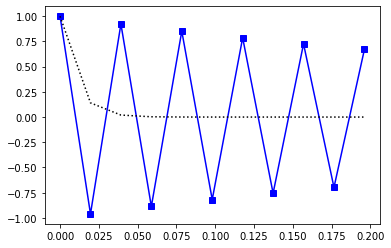

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def ForwardEulerExample(y,h,k):
    y_new=y+h*(k*y)
    return y_new


h=1/51
k=-100.0
y0=1.0
T=h*10#1.0
print(abs(1+h*k))
Nt=int(T/h)
t=np.linspace(0,T,Nt+1)
y_FE=np.zeros(Nt+1)
y_FE[0]=y0
for j in range(0,Nt):
    y_FE[j+1]=ForwardEulerExample(y_FE[j],h,k)

y_true=np.exp(k*t)
err_FE=abs(y_true-y_FE)
plt.plot(t,y_FE,'-sb',t,np.exp(k*t),':k')


**Backward Euler**: Let's look at the stability region for Backward Euler

$$y_{i+1}=y_{i}+hf(t_{i+1},y_{i+1})$$

$$=y_{i}+h\lambda y_{i+1}$$

$$y_{i+1}(1-h\lambda )=y_{i}$$

$$y_{i+1}=\frac{1}{1-h\lambda}y_{i}$$

$$y_{i+1}=\left(\frac{1}{1-h\lambda}\right)^{i+1}y_{0}$$


So our solution is stable if $|\frac{1}{1-h\lambda}|<1$. 

The resulting region is everywhere in $\mathbb{C}$ except for a unit circle centered at $\lambda h=1$.


0.000999000999000999


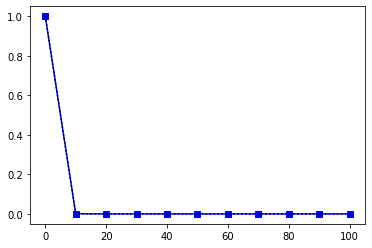

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def BackwardEulerExample(y,h,k):
    y_new=y/(1-k*h)
    return y_new

h=10
k=-100.0
y0=1.0
T=h*10  #1.0
print(abs(1/(1-h*k)))
Nt=int(T/h)
t=np.linspace(0,T,Nt+1)
y_BE=np.zeros(Nt+1)

y_BE[0]=y0
for j in range(0,Nt):
    y_BE[j+1]=BackwardEulerExample(y_BE[j],h,k)

y_true=np.exp(k*t)
err_BE=abs(y_true-y_BE)
plt.plot(t,y_BE,'-sb',t,np.exp(k*t),':k')
